## Gradiennt Descent

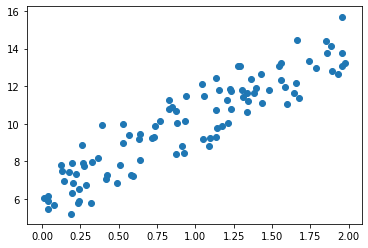

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y = 4x + 6 식을 근사 (w1=4, w0=6) 코드 실습을 위한 고의적으로 데이터를 만든다
#random값은 noise를 만들기 위해 만든 것이다.
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)#표준정규분포난수생성(표준0, 표준편차1)
#randn이 array를 반환하므로 100, 1 = m, n

plt.scatter(X, y)

In [3]:
#w1, w0 업데이트할 w1_update, w0_update반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    #w1, w0과 동일 크기인 행렬(초기값0)으로 지정
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #예측배열(y)계산, 예측값과 계산값 차이 계산
    y_pred = np.dot(X, w1.T) + w0 #행렬내적계산생각
    diff = y-y_pred
    
    #w0_update를 dot연산으로 구하기 위해 모두 1값인 행렬을 생성한다
    w0_factors = np.ones((N,1))
    
    #편미분값
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [4]:
#iters만큼 반복하면서 w1과 w0을 업데이트한다
def gradient_descent_steps(X, y, iters=10000):
    #w0, w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [5]:
#cost계산
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [6]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


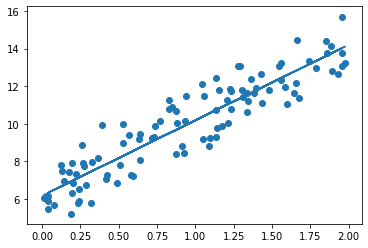

In [7]:
plt.scatter(X,y)
plt.plot(X, y_pred)

cost가 감소하는지 확인하고 수행하는 단계는 생략한 듯 하다

#### mini batch stochastic GD

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        stochastic_random_index = np.random.permutation(X.shape[0])#permutation: array_like or int :array를 복사해 shuffle
        #여기선 int이므로 np.arange(X.shape[0]) 을 shuffle
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


## sklearn LinearRegression practice - Boston House Price prediction

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#load boston dataset
boston = load_boston()

#conversion to DataFrame
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

print(bostonDF.shape)
bostonDF.head()


(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
bostonDF['PRICE'] = boston.target
print(bostonDF.shape)

(506, 14)


In [12]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


이 중 RM, AN, INDUS, NOX, AGE, PTRATIO, LSTAT, RAD column들 대해 PRICE값 어떻게 변하는지 seaborn을 통해 그려 확인  
seaborn의 regplot() API는 X, Y축 산점도와 함께 선형회귀직선을 그려준다.

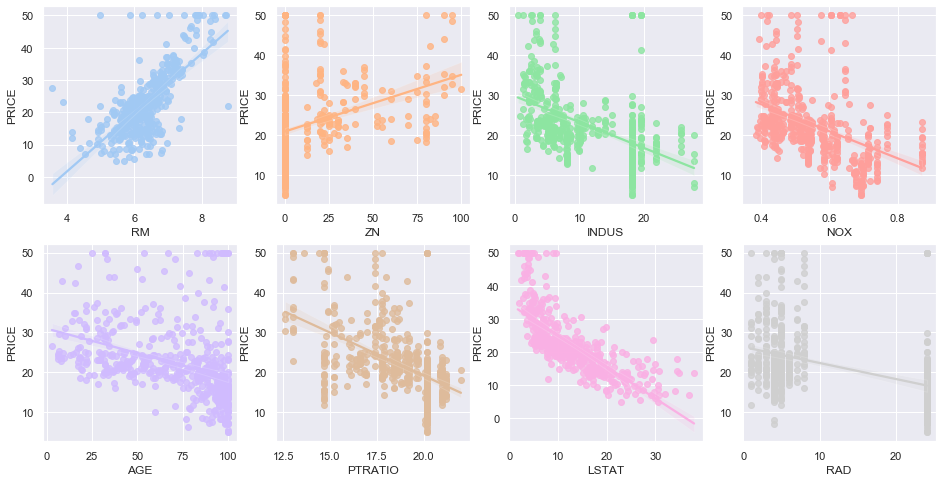

In [13]:
#matplotlib.subplot으로 각 ax마다 colomn과 PRICE 관계 그려준다
sns.set()
pastel = sns.set_palette("pastel")

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
#colors = ['b', 'o', 'g', 'r','p', 'b']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature,y='PRICE', data=bostonDF, ax=axs[row][col], color='C'+str(i))

RM(방 수)과 LSTAT(하위계층비율)의 PRICE영향도가 두드러진다.

In [14]:
#본격적 회귀모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
y_target = bostonDF['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:', mse, 'rmse:', rmse)
print('Variance score:', r2_score(y_test, y_preds))

MSE: 17.29691590790215 rmse: 4.158956107955715
Variance score: 0.7572263323138921


In [15]:
#model의 intercept와 coefficients 확인
print('intercept:', lr.intercept_)
print('coefficients:', np.round(lr.coef_, 1))

intercept: 40.995595172164336
coefficients: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [16]:
#feature별 회귀계수 매핑(Series로 만듬) 큰값 순 정렬(Series의 sort_values())이용
coeff = pd.Series(data = np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
#최적화 수행하며 coefficients변화 살펴보기
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5folds의 평균 RMSE score:', np.round(avg_rmse,3))

5folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5folds의 평균 RMSE score: 5.829


## Polynomial Regression

In [18]:
#PolynomialFeatures 동작 살펴보기
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변환된 2차 다항식계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


임의로 3차 다항회귀 함수를 설정한 후 회귀계수 예측  
y = 1 + 2x1 + 3x1^2 + 4x2^2

In [19]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(0,4).reshape(2,2)

y = polynomial_func(X)
print('일차 단항식 계수 feature:\n', X)
print('삼차다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차다항식 결정값:
 [  5 125]


In [20]:
#일차단항식계수를 삼차 다항식 계수로 변환해 선형회귀에 적용
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식계수:\n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr,y)
print('polynomial회귀계수\n', np.round(model.coef_,2))
print('polynomial회귀shape:', model.coef_.shape)

3차 다항식계수:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
polynomial회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
polynomial회귀shape: (10,)


In [21]:
#pipeline이용
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

X = np.arange(0,4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('polynomial회귀계수\n',np.round(model.named_steps['linear'].coef_,2))

polynomial회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## Polynomial Regression 으로 underfitting, overfitting 이해하기

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#random으로 구성된 X값 대해 cosine변환값을 반환한다.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

#X는 0~1사이 30개 random값 순서대로 sampling한 data
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples)) #크기순배열

#cosine기반 true_fun에서 약간의 noise 더해주어 y
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.48 입니다.


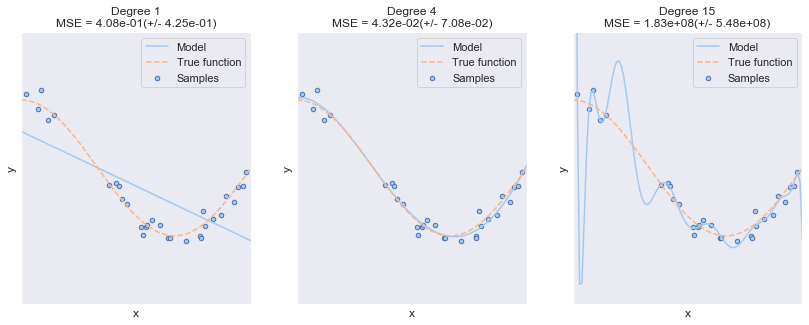

In [23]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

## Regularized Linear Models - Ridge, Lasso

#### Ridge

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores,3))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))


5 folds의 개별 Negative MSE scores [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


In [27]:
#alpha값 변화시키며 관찰
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {} 일 때 5folds의 평균 RMSE:{:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5folds의 평균 RMSE:5.829
alpha 0.1 일 때 5folds의 평균 RMSE:5.788
alpha 1 일 때 5folds의 평균 RMSE:5.653
alpha 10 일 때 5folds의 평균 RMSE:5.518
alpha 100 일 때 5folds의 평균 RMSE:5.330


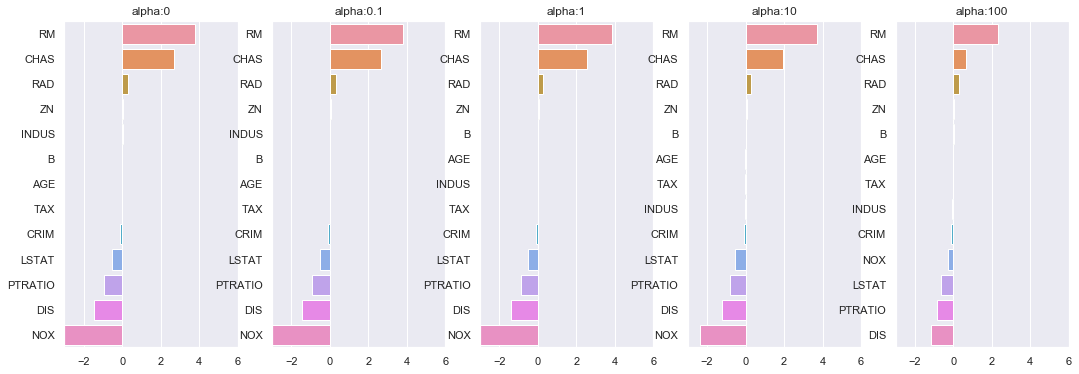

In [29]:
#각 alpha별 회귀계수값 시각화 위해 5개의 열로 된 matplotlib축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
#각 alpha별 회귀계수값 데이터로 저장 위한 DataFrame생성
coeff_df = pd.DataFrame()

#alphas 리스트 값 차례로 입력해 회귀계수값 시각화 및 데이터저장. pos는 axis위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    #alpha따른 피쳐별 회귀 계수 Series로 변환하고 DataFrame column으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    
    #막대그래프로 각 alpha 값에서 회귀계수 시각화, 회귀계수값이 높은 순 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values,y=coeff.index, ax=axs[pos])
    
plt.show()

In [32]:
coeff_df.sort_values(by='alpha:0', ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


#### Lasso

In [34]:
from sklearn.linear_model import Lasso, ElasticNet

#alpha값 따른 회귀 모델 폴드 평균 RMSE 출력하고 회귀계수값들 DF로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print('#######', model_name,'#######')
    for param in params:
        if model_name == 'Ridge':model = Ridge(alpha=param)
        elif model_name == 'Lasso':model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha{}일때 5folds세트의 평균 RMSE:{:.3f}'.format(param, avg_rmse))
        #cross_val_score은 evaluation metric만 반환하므로 모델 다시 학습
        model.fit(X_data,y_target)
        #alpha따른 feature별 회귀계수 Series로 반환해서 DataFrame column으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname] = coeff
        
    return coeff_df
    

In [35]:
#lasso에 사용될 alpha파라미터의 값들 정의하고 get_linear_reg_eval()함수 호출
lasso_alphas = [0.07, 0.1,0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha0.07일때 5folds세트의 평균 RMSE:5.612
alpha0.1일때 5folds세트의 평균 RMSE:5.615
alpha0.5일때 5folds세트의 평균 RMSE:5.669
alpha1일때 5folds세트의 평균 RMSE:5.776
alpha3일때 5folds세트의 평균 RMSE:6.189


In [37]:
#반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬 - 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


#### ElasticNet

In [38]:
#ElasticNet에 사용될 alpha파라미터값들 정의 후 get_lilnear_reg_eval()함수 호출
#l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha0.07일때 5folds세트의 평균 RMSE:5.542
alpha0.1일때 5folds세트의 평균 RMSE:5.526
alpha0.5일때 5folds세트의 평균 RMSE:5.467
alpha1일때 5folds세트의 평균 RMSE:5.597
alpha3일때 5folds세트의 평균 RMSE:6.068


In [39]:
#반환된 coeff_elastic_df를 첫번째 컬럼 순으로 내림차순 정렬
sort_columnn = 'alpha'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 선형회귀 모델 위한 데이터변환

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method : Standard, MinMax, Log
#p_degree: 다항식 특성 추가할 때(2이상 부여 안하겠음)
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method=='Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
        #include_bias 옵션은 True로 할 경우 0차항(1)도 함께 만든다.
        
    return scaled_data

In [55]:

# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha0.1일때 5folds세트의 평균 RMSE:5.788
alpha1일때 5folds세트의 평균 RMSE:5.653
alpha10일때 5folds세트의 평균 RMSE:5.518
alpha100일때 5folds세트의 평균 RMSE:5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha0.1일때 5folds세트의 평균 RMSE:5.826
alpha1일때 5folds세트의 평균 RMSE:5.803
alpha10일때 5folds세트의 평균 RMSE:5.637
alpha100일때 5folds세트의 평균 RMSE:5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha0.1일때 5folds세트의 평균 RMSE:8.827
alpha1일때 5folds세트의 평균 RMSE:6.871
alpha10일때 5folds세트의 평균 RMSE:5.485
alpha100일때 5folds세트의 평균 RMSE:4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha0.1일때 5folds세트의 평균 RMSE:5.764
alpha1일때 5folds세트의 평균 RMSE:5.465
alpha10일때 5folds세트의 평균 RMSE:5.754
alpha100일때 5folds세트의 평균 RMSE:7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha0.1일때 5folds세트의 평균 RMSE:5.298
alpha1일때 5folds세트의 평균 RMSE:4.323
alpha10일때 5folds세트의 평균 RMSE:5.185
alpha100일때 5folds세트의 평균 RMSE:6.538

## 변환 유형:Log, Polynomial Degree:None
alpha0.1일때 5folds세트의 평균 RMSE:4.770
alpha1일때 5folds세트의 평균 RMSE:4.676
alpha10일